In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library('rerddap')

url <- 'http://gcoos4.tamu.edu:8080/erddap/'
data_info <- rerddap::info('cremp_fk_v2_1996', url=url)

data_info

<ERDDAP info> cremp_fk_v2_1996 
 Dimensions (range):  
 Variables:  
     averageNumberOfPoints: 
         Range: 407.0, 900.0 
     basisOfRecord: 
     bottomType: 
     class: 
     country: 
     datasetID: 
     datasetName: 
     depth: 
         Range: 3.0, 54.0 
         Units: m 
     dynamicProperties: 
     eventDate: 
     eventDateRemarks: 
     eventDateTimeZone: 
     family: 
     firstYear: 
         Range: 1996.0, 1996.0 
     genus: 
     geodeticDatum: 
     habitat: 
     higherInstitutionCode: 
     institutionCode: 
     kingdom: 
     lastYear: 
         Range: 2000.0, 2015.0 
     latitude: 
         Range: 24.4517, 25.2953 
         Units: degrees_north 
     locality: 
     longitude: 
         Range: -81.9195, -80.2087 
         Units: degrees_east 
     materialSampleID: 
     maximumDepthInMeters: 
         Range: 3.0, 54.0 
         Units: m 
     minimumDepthInMeters: 
         Range: 3.0, 54.0 
         Units: m 
     order: 
     ownerInstitutionCode: 

In [3]:
%%R -o rdf

fields <- c(
    'Samples',
    'time',
    'longitude',
    'latitude',
    'scientificName',
    'habitat',
    'genus',
    'quantificationValue'
)

rdf <- tabledap(
    data_info,
    fields=fields,
    url=url
)

In [4]:
import pandas as pd
from rpy2.robjects import pandas2ri


pandas2ri.activate()
df = pandas2ri.ri2py_dataframe(rdf)

cols = ['longitude', 'latitude', 'quantificationValue']
df[cols] = df[cols].apply(pd.to_numeric)

df.head()

,Samples,time,longitude,latitude,scientificName,habitat,genus,quantificationValue
2,0,1996-01-01T00:00:00Z,-80.3475,25.1736,Acropora cervicornis,Hard Bottom,Acropora,0.0
3,1,1996-01-01T00:00:00Z,-80.3475,25.1736,Acropora cervicornis,Hard Bottom,Acropora,0.0
4,2,1996-01-01T00:00:00Z,-80.3475,25.1736,Acropora cervicornis,Hard Bottom,Acropora,0.0
5,3,1996-01-01T00:00:00Z,-80.3475,25.1736,Acropora cervicornis,Hard Bottom,Acropora,0.0
6,4,1996-01-01T00:00:00Z,-80.3782,25.1201,Acropora cervicornis,Hard Bottom,Acropora,0.0


In [5]:
# Filter valid values.
cremp_1996 = df.loc[df['quantificationValue'] >0]
cremp_1996.head()

,Samples,time,longitude,latitude,scientificName,habitat,genus,quantificationValue
33,31,1996-01-01T00:00:00Z,-80.2174,25.2953,Acropora cervicornis,Patch Reef,Acropora,0.0168
44,42,1996-01-01T00:00:00Z,-80.9669,24.6993,Acropora cervicornis,Patch Reef,Acropora,0.0117
95,93,1996-01-01T00:00:00Z,-81.1092,24.6269,Acropora cervicornis,Shallow Fore Reef,Acropora,0.0015
99,97,1996-01-01T00:00:00Z,-81.4071,24.5452,Acropora cervicornis,Shallow Fore Reef,Acropora,0.0067
100,98,1996-01-01T00:00:00Z,-81.4063,24.5453,Acropora cervicornis,Shallow Fore Reef,Acropora,0.0018


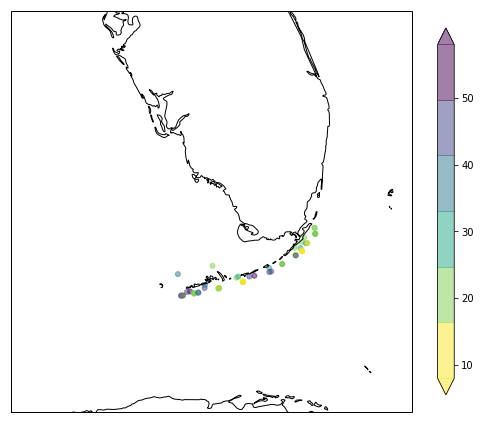

In [6]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)

# c = ax.scatter(cremp_1996['longitude'], cremp_1996['latitude'], s=25)
count = cremp_1996.groupby(['longitude', 'latitude']).count().reset_index()
c = ax.scatter(
    count['longitude'],
    count['latitude'],
    s=25,
    c=count['genus'],
    alpha=0.5,
    cmap=plt.cm.get_cmap('viridis_r', 6))
cbar = fig.colorbar(c, shrink=0.75, extend='both')

ax.coastlines(resolution='10m')
ax.set_extent([-84, -79, 23, 28])

In [7]:
avg = cremp_1996.groupby('genus').mean()
avg

,Samples,longitude,latitude,quantificationValue
genus,,,,
,7818.074803,-81.043018,24.766966,0.188590
Acropora,190.411765,-81.331594,24.635185,0.056503
Agaricia,470.000000,-81.714200,24.479600,0.001600
Colpophyllia,877.529412,-81.205953,24.690874,0.023900
Dendrogyra,1058.500000,-81.167300,24.704100,0.106150
Dichocoenia,1198.416667,-81.104625,24.724383,0.003942
Diploria,1375.045455,-81.066014,24.726709,0.009605
Eusmilia,1517.333333,-81.136633,24.643800,0.002267
Favia,1683.000000,-80.577800,24.876900,0.002500


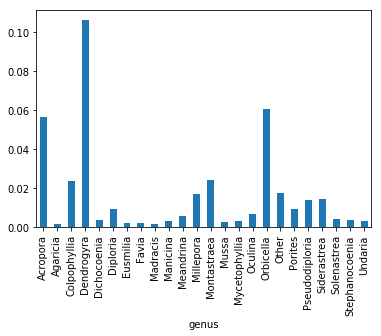

In [8]:
ax = avg.iloc[1:]['quantificationValue'].plot(kind='bar')